In [3]:
###1.Import Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
!pip install scikit-learn
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE
import itertools




In [5]:
###2.Read the Dataset

In [6]:

df=pd.read_csv("dataset_part1.csv")
df

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,10311747,4,0,24,0,6,6,6.000000,0.000000,...,20,1998.0,0.0,1998,1998,10300000.0,0.0,10300000,10300000,DDoS
1,6,10901448,21,31,2008,2745,640,0,95.619050,140.045170,...,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Patator
2,6,85416,8,5,371,3662,178,0,46.375000,77.167600,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,6,1889734,3,5,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
4,6,99885669,6,6,337,11595,337,0,56.166668,137.579680,...,32,979.0,0.0,979,979,99900000.0,0.0,99900000,99900000,DoS Hulk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52271,6,10729235,8,6,373,11632,373,0,46.625000,131.875410,...,32,771.0,0.0,771,771,5725562.0,0.0,5725562,5725562,DoS GoldenEye
52272,6,63158138,7,0,0,0,0,0,0.000000,0.000000,...,40,7014657.0,0.0,7014657,7014657,18700000.0,12300000.0,32100000,8015924,DoS Slowhttptest
52273,6,1724018,3,5,26,11601,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
52274,6,100297832,9,5,297,11595,297,0,33.000000,99.000000,...,32,7.0,0.0,7,7,100000000.0,0.0,100000000,100000000,DoS Hulk


In [7]:
###Insights

In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52276 entries, 0 to 52275
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Protocol                  52276 non-null  int64  
 1   Flow Duration             52276 non-null  int64  
 2   Total Fwd Packets         52276 non-null  int64  
 3   Total Backward Packets    52276 non-null  int64  
 4   Fwd Packets Length Total  52276 non-null  int64  
 5   Bwd Packets Length Total  52276 non-null  int64  
 6   Fwd Packet Length Max     52276 non-null  int64  
 7   Fwd Packet Length Min     52276 non-null  int64  
 8   Fwd Packet Length Mean    52276 non-null  float64
 9   Fwd Packet Length Std     52276 non-null  float64
 10  Bwd Packet Length Max     52276 non-null  int64  
 11  Bwd Packet Length Min     52276 non-null  int64  
 12  Bwd Packet Length Mean    52276 non-null  float64
 13  Bwd Packet Length Std     52276 non-null  float64
 14  Flow B

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Protocol,52276.0,6.795738e+00,2.852312e+00,0.0,6.00,6.0,6.00,17.0
Flow Duration,52276.0,3.113048e+07,4.015050e+07,-1.0,352757.75,9454757.5,63150109.25,119999914.0
Total Fwd Packets,52276.0,7.950589e+00,7.166893e+01,1.0,3.00,5.0,8.00,9692.0
Total Backward Packets,52276.0,7.137157e+00,7.744208e+01,0.0,1.00,3.0,6.00,12392.0
Fwd Packets Length Total,52276.0,7.695974e+02,2.023443e+04,0.0,14.00,86.0,379.00,2866110.0
...,...,...,...,...,...,...,...,...
Active Min,52276.0,3.871420e+05,1.518112e+06,0.0,0.00,0.0,990.00,26200000.0
Idle Mean,52276.0,2.180584e+07,3.612883e+07,0.0,0.00,0.0,19200000.00,120000000.0
Idle Std,52276.0,2.034698e+06,7.828010e+06,0.0,0.00,0.0,0.00,71700000.0
Idle Max,52276.0,2.398828e+07,3.722350e+07,0.0,0.00,0.0,32100000.00,120000000.0


In [10]:
df.describe(include='object').T

,count,unique,top,freq
Label,52276,15,DoS GoldenEye,8031


In [11]:
df.shape

(52276, 78)

In [12]:
###Data Cleaning

In [13]:
#checking duplicate datas
print("Number of duplicate values in dataset:",df.duplicated().sum())

Number of duplicate values in dataset: 3


In [14]:
df=df.drop_duplicates()

In [15]:
#checking duplicate datas
print("Number of duplicate values in dataset after dropping duplicates:",df.duplicated().sum())

Number of duplicate values in dataset after dropping duplicates: 0


In [16]:
df.shape

(52273, 78)

In [17]:
df['Protocol'].value_counts()

Protocol
6     48481
17     3784
0         8
Name: count, dtype: int64

In [18]:
""" 6==TCP
    17==UDP
    0==HOP-by-HOP(IPV6)"""

' 6==TCP\n    17==UDP\n    0==HOP-by-HOP(IPV6)'

In [19]:
df['Label'].value_counts()

Label
DoS GoldenEye                 8031
Benign                        7986
DDoS                          7954
DoS Hulk                      7931
FTP-Patator                   4787
DoS slowloris                 4317
DoS Slowhttptest              4220
SSH-Patator                   2593
PortScan                      1566
Web Attack � Brute Force      1153
Bot                           1152
Web Attack � XSS               524
Infiltration                    31
Web Attack � Sql Injection      19
Heartbleed                       9
Name: count, dtype: int64

In [20]:
###4.EDA Visualization

In [21]:
# Filter the DataFrame for specific labels
#selected_labels = ['Benign', 'DoS Hulk', 'DDoS', 'DoS GoldenEye', 'FTP-Patator', 'DoS slowloris', 'DoS Slowhttptest', 'SSH-Patator', 'PortScan', 'Web Attack   Brute Force', 'Bot', 'Web Attack   XSS', 'Infiltration', 'Web Attack   Sql Injection', 'Heartbleed']
#filtered_df = df[df['Label'].isin(selected_labels)]

for value in df['Label']:
    selected_labels=df['Label'].unique()
filtered_df = df[df['Label'].isin(selected_labels)]

# Count the occurrences of each selected label
label_counts = filtered_df['Label'].value_counts()

# Convert to a DataFrame for better handling
label_counts_df = label_counts.reset_index()
label_counts_df.columns = ['Label', 'Count']

In [65]:
label_counts_df

,Label,Count
0,DoS GoldenEye,8031
1,Benign,7986
2,DDoS,7954
3,DoS Hulk,7931
4,FTP-Patator,4787
5,DoS slowloris,4317
6,DoS Slowhttptest,4220
7,SSH-Patator,2593
8,PortScan,1566
9,Web Attack � Brute Force,1153


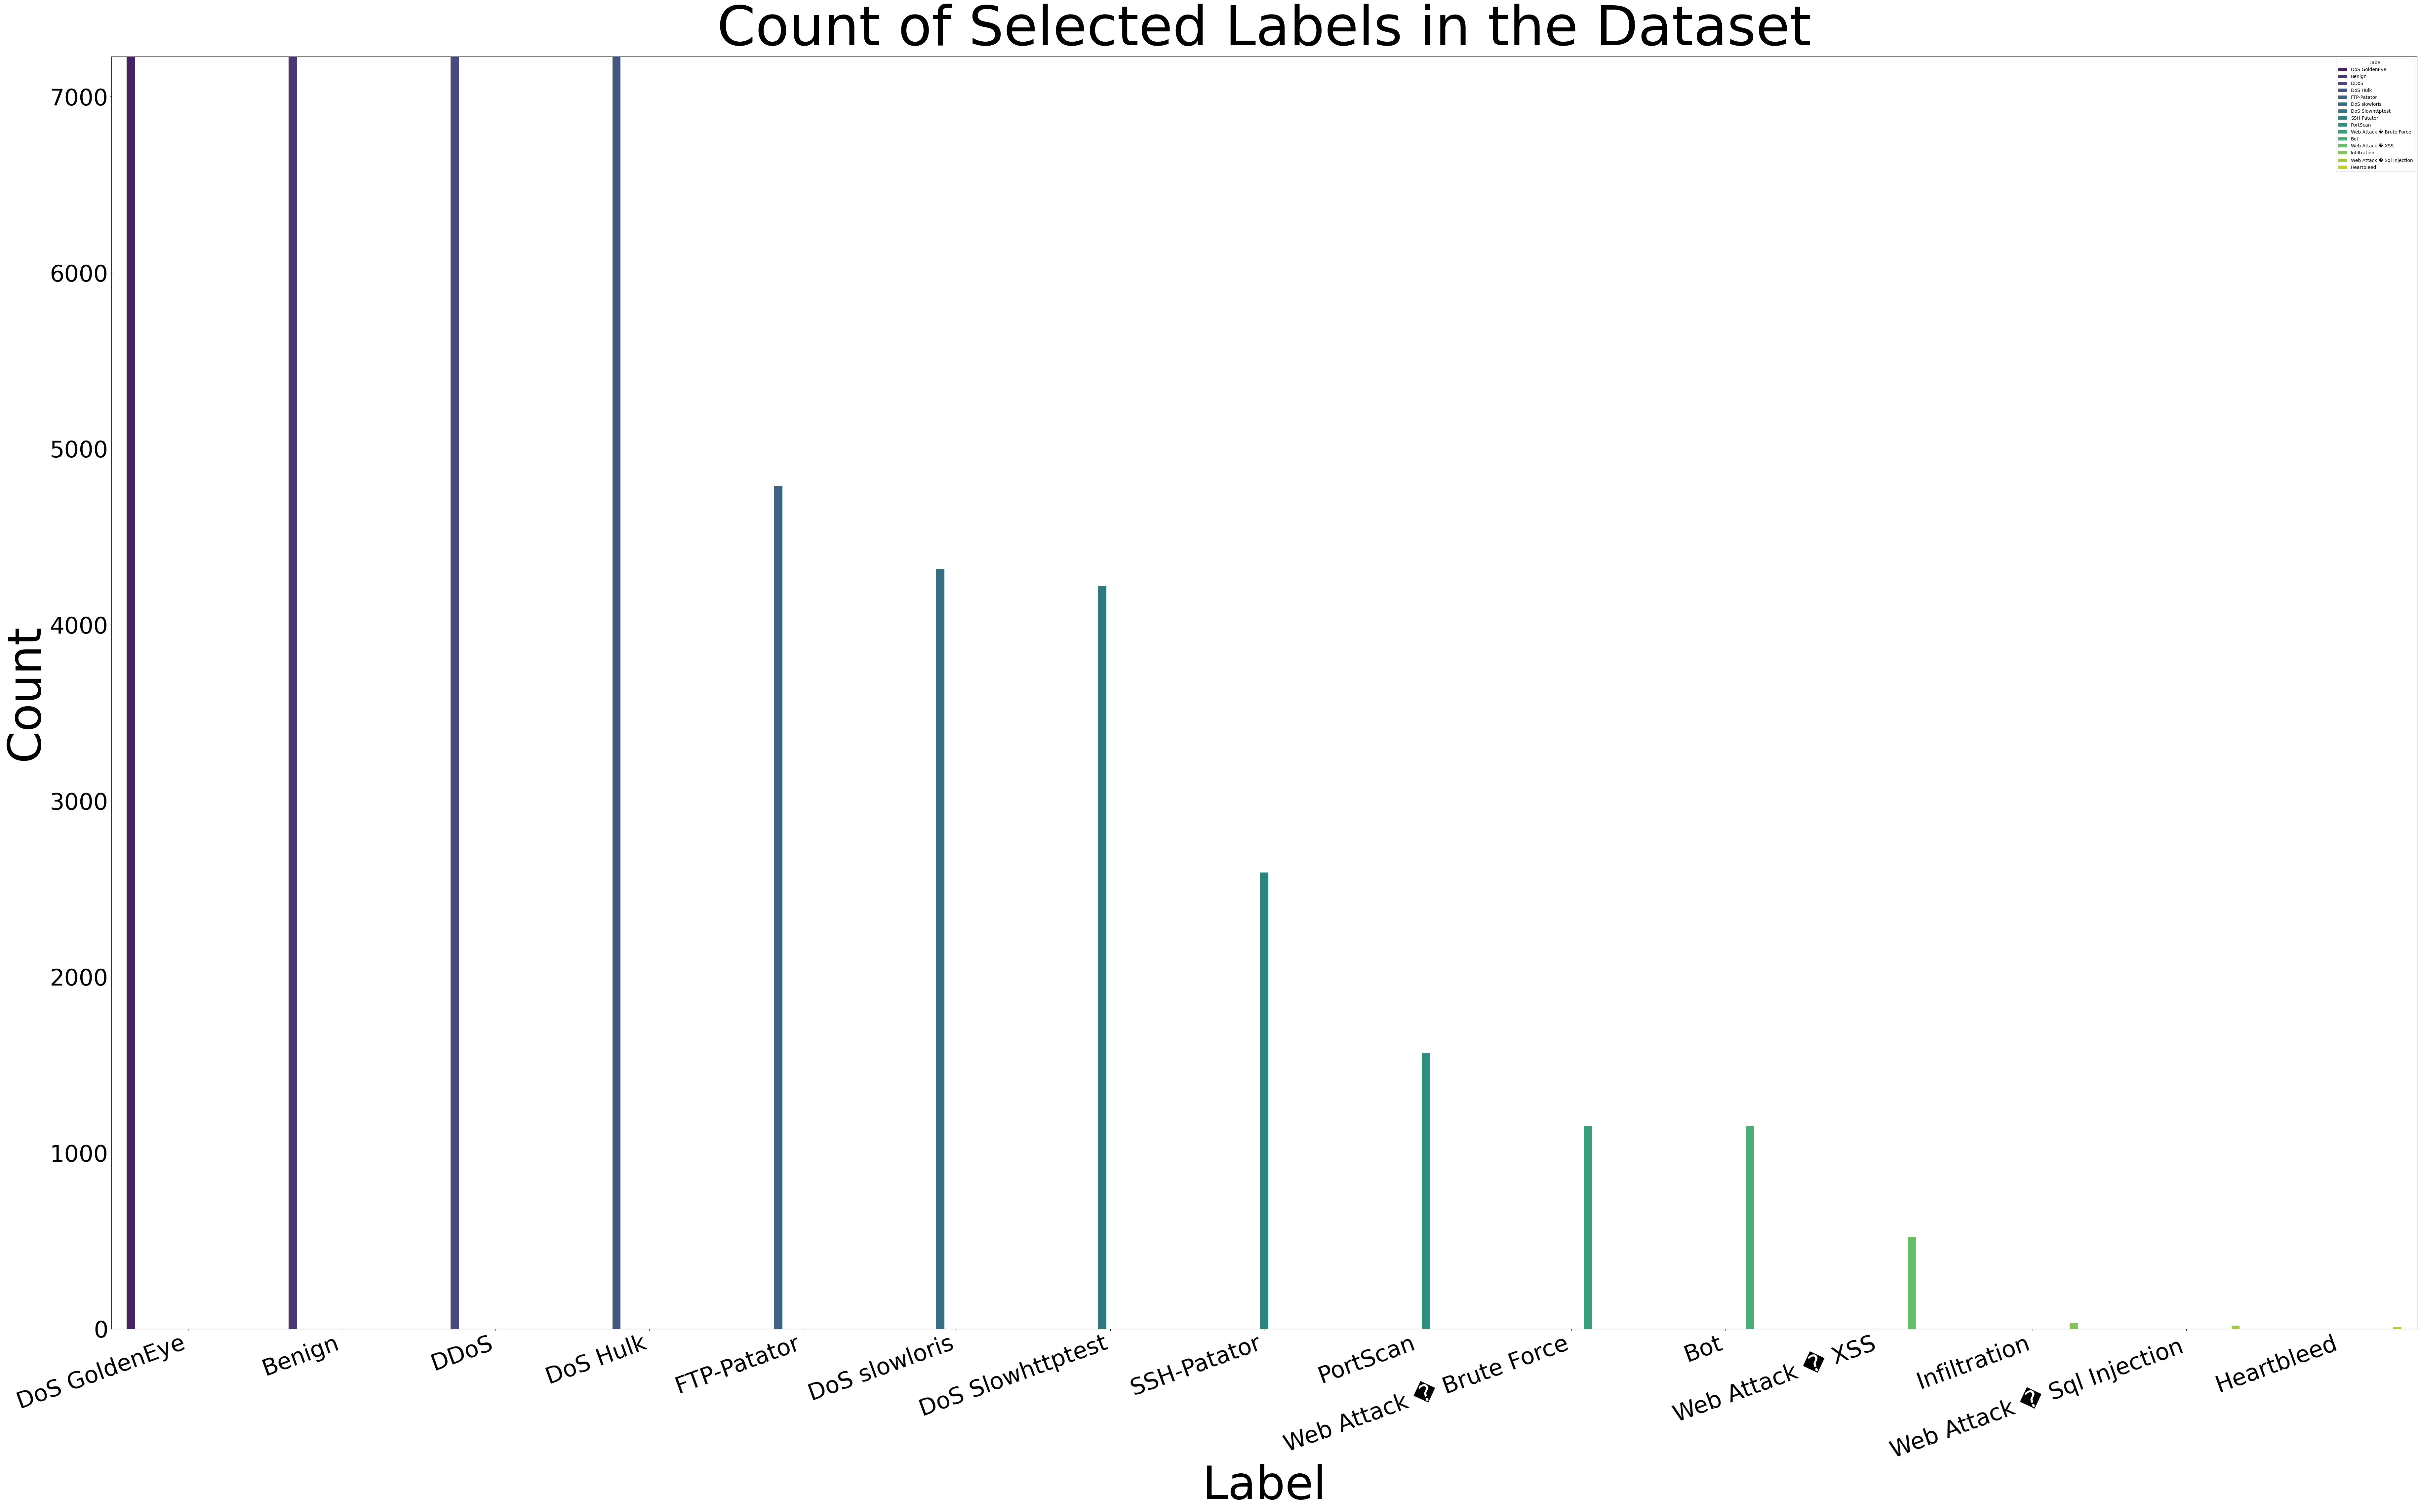

In [22]:
# Set the size of the plot
plt.figure(figsize=(90, 50))

# Create the bar plot
sns.barplot(x='Label', y='Count', data=label_counts_df, hue='Label', palette='viridis')



# Add title and labels
plt.title('Count of Selected Labels in the Dataset', fontsize=120)
plt.xlabel('Label', fontsize=100)
plt.ylabel('Count', fontsize=100)


# Adjust y-axis tick label size
plt.yticks(fontsize=50)
plt.xticks(rotation=20, ha='right', fontsize=50)
plt.ylim(0, label_counts_df['Count'].max() *0.9)


# Show the plot
plt.show()0

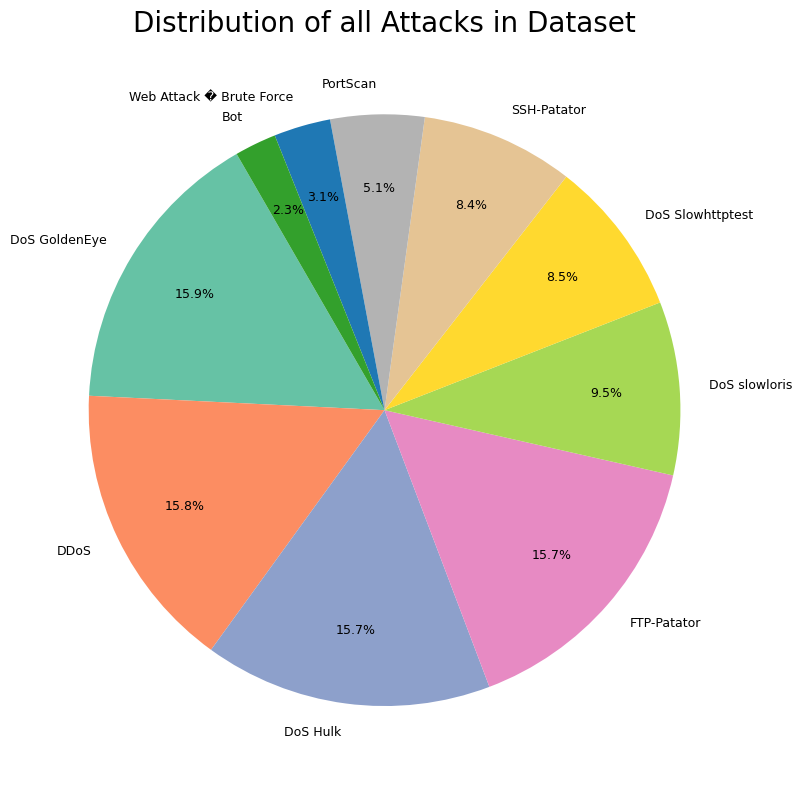

In [23]:
filtered_df = label_counts_df[label_counts_df['Label'] != 'Benign']

# Define custom colors for the pie chart
custom_colors = [
    '#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', 
    '#e5c494', '#b3b3b3', '#1f78b4', '#33a02c', '#fb9a99', '#e31a1c',
    '#fdbf6f', '#ff7f00', '#cab2d6'
]

# Set the size of the plot
plt.figure(figsize=(10, 8))  # Increase the figure size for more space

# Create the pie chart
plt.pie(label_counts_df['Count'][0:10], labels=filtered_df['Label'][0:10], autopct='%1.1f%%', 
        colors=custom_colors, startangle=120, pctdistance=0.75, labeldistance=1.1, textprops={'fontsize': 9})

# Add title
plt.title('Distribution of all Attacks in Dataset', fontsize=20)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()



Normal counts: [4200, 3783, 3]
Attack counts: [44281, 1, 5]


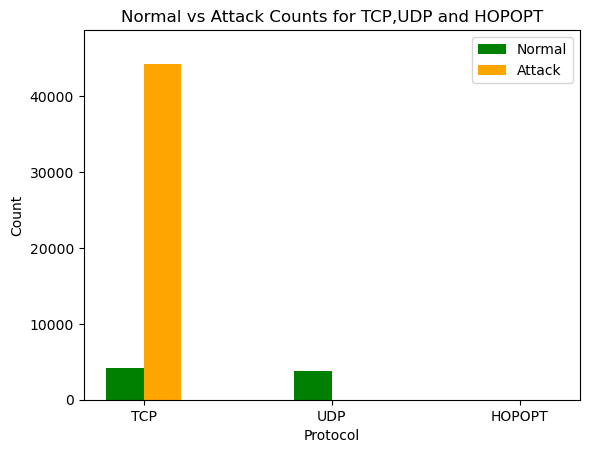

In [24]:
df10 = df.copy()
df10

# Map protocol numbers to names and classify labels
df10['Protocol'] = df10['Protocol'].map({6: 'TCP', 17: 'UDP', 0: 'HOPOPT'})
df10['Label'] = df10['Label'].apply(lambda x: 'Normal' if x == 'Benign' else 'Attack')

# Filter data by protocol
tcp_data = df10[df10['Protocol'] == 'TCP']
udp_data = df10[df10['Protocol'] == 'UDP']
hopopt_data = df10[df10['Protocol'] == 'HOPOPT']


# Count occurrences of "Normal" and "Attack" for each protocol
tcp_counts = tcp_data['Label'].value_counts()
udp_counts = udp_data['Label'].value_counts()
hopopt_counts=hopopt_data['Label'].value_counts()

# Prepare data for plotting
labels = ['TCP', 'UDP','HOPOPT']
normal_counts = [tcp_counts.get('Normal', 0), udp_counts.get('Normal', 0), hopopt_counts.get('Normal',0)]
attack_counts = [tcp_counts.get('Attack', 0), udp_counts.get('Attack', 0), hopopt_counts.get('Attack',0)]

# Print counts to verify
print("\nNormal counts:", normal_counts)
print("Attack counts:", attack_counts)

# Plotting
x = range(len(labels))
width = 0.2  # Width of the bars

fig, ax = plt.subplots()
normal_color = 'green'  
attack_color = 'orange' 
# Plot Normal and Attack bars side by side
ax.bar([p - width/2 for p in x], normal_counts, width=width, label='Normal', color=normal_color, align='center')
ax.bar([p + width/2 for p in x], attack_counts, width=width, label='Attack', color=attack_color, align='center')

# Add labels and title
ax.set_xlabel('Protocol')
ax.set_ylabel('Count')
ax.set_title('Normal vs Attack Counts for TCP,UDP and HOPOPT')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Adjust y-axis limits to ensure visibility of small values
max_y = max(max(normal_counts), max(attack_counts)) * 1.1  # 10% padding
ax.set_ylim(0, max_y)


ax.legend()

# Display the plot
plt.show()

In [25]:
df

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,10311747,4,0,24,0,6,6,6.000000,0.000000,...,20,1998.0,0.0,1998,1998,10300000.0,0.0,10300000,10300000,DDoS
1,6,10901448,21,31,2008,2745,640,0,95.619050,140.045170,...,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Patator
2,6,85416,8,5,371,3662,178,0,46.375000,77.167600,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,6,1889734,3,5,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
4,6,99885669,6,6,337,11595,337,0,56.166668,137.579680,...,32,979.0,0.0,979,979,99900000.0,0.0,99900000,99900000,DoS Hulk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52271,6,10729235,8,6,373,11632,373,0,46.625000,131.875410,...,32,771.0,0.0,771,771,5725562.0,0.0,5725562,5725562,DoS GoldenEye
52272,6,63158138,7,0,0,0,0,0,0.000000,0.000000,...,40,7014657.0,0.0,7014657,7014657,18700000.0,12300000.0,32100000,8015924,DoS Slowhttptest
52273,6,1724018,3,5,26,11601,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
52274,6,100297832,9,5,297,11595,297,0,33.000000,99.000000,...,32,7.0,0.0,7,7,100000000.0,0.0,100000000,100000000,DoS Hulk


In [26]:
###5.Data Preprocessing

In [27]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
df.loc[:, 'Label'] = le.fit_transform(df['Label'])

In [29]:
df.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,10311747,4,0,24,0,6,6,6.000000,0.000000,...,20,1998.0,0.0,1998,1998,10300000.0,0.0,10300000,10300000,2
1,6,10901448,21,31,2008,2745,640,0,95.619050,140.045170,...,32,0.0,0.0,0,0,0.0,0.0,0,0,11
2,6,85416,8,5,371,3662,178,0,46.375000,77.167600,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
3,6,1889734,3,5,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,2
4,6,99885669,6,6,337,11595,337,0,56.166668,137.579680,...,32,979.0,0.0,979,979,99900000.0,0.0,99900000,99900000,4


In [30]:
df['Label'].dtype

dtype('O')

In [31]:
df.isnull().sum()

Protocol                    0
Flow Duration               0
Total Fwd Packets           0
Total Backward Packets      0
Fwd Packets Length Total    0
                           ..
Idle Mean                   0
Idle Std                    0
Idle Max                    0
Idle Min                    0
Label                       0
Length: 78, dtype: int64

In [32]:
#df['Label'] = df['Label'].astype('int64')

df['Label'] = df['Label'].astype('int64')


C:\Users\pvste\AppData\Local\Temp\ipykernel_27952\1648791577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'] = df['Label'].astype('int64')


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52273 entries, 0 to 52275
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Protocol                  52273 non-null  int64  
 1   Flow Duration             52273 non-null  int64  
 2   Total Fwd Packets         52273 non-null  int64  
 3   Total Backward Packets    52273 non-null  int64  
 4   Fwd Packets Length Total  52273 non-null  int64  
 5   Bwd Packets Length Total  52273 non-null  int64  
 6   Fwd Packet Length Max     52273 non-null  int64  
 7   Fwd Packet Length Min     52273 non-null  int64  
 8   Fwd Packet Length Mean    52273 non-null  float64
 9   Fwd Packet Length Std     52273 non-null  float64
 10  Bwd Packet Length Max     52273 non-null  int64  
 11  Bwd Packet Length Min     52273 non-null  int64  
 12  Bwd Packet Length Mean    52273 non-null  float64
 13  Bwd Packet Length Std     52273 non-null  float64
 14  Flow Bytes/

In [34]:
X = df.drop(columns='Label')
y = df['Label']
X

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,6,10311747,4,0,24,0,6,6,6.000000,0.000000,...,3,20,1998.0,0.0,1998,1998,10300000.0,0.0,10300000,10300000
1,6,10901448,21,31,2008,2745,640,0,95.619050,140.045170,...,16,32,0.0,0.0,0,0,0.0,0.0,0,0
2,6,85416,8,5,371,3662,178,0,46.375000,77.167600,...,3,32,0.0,0.0,0,0,0.0,0.0,0,0
3,6,1889734,3,5,26,11607,20,0,8.666667,10.263203,...,2,20,0.0,0.0,0,0,0.0,0.0,0,0
4,6,99885669,6,6,337,11595,337,0,56.166668,137.579680,...,1,32,979.0,0.0,979,979,99900000.0,0.0,99900000,99900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52271,6,10729235,8,6,373,11632,373,0,46.625000,131.875410,...,1,32,771.0,0.0,771,771,5725562.0,0.0,5725562,5725562
52272,6,63158138,7,0,0,0,0,0,0.000000,0.000000,...,0,40,7014657.0,0.0,7014657,7014657,18700000.0,12300000.0,32100000,8015924
52273,6,1724018,3,5,26,11601,20,0,8.666667,10.263203,...,2,20,0.0,0.0,0,0,0.0,0.0,0,0
52274,6,100297832,9,5,297,11595,297,0,33.000000,99.000000,...,1,32,7.0,0.0,7,7,100000000.0,0.0,100000000,100000000


In [35]:
y

0         2
1        11
2         0
3         2
4         4
         ..
52271     3
52272     5
52273     2
52274     4
52275     3
Name: Label, Length: 52273, dtype: int64

In [36]:
y.value_counts()

Label
3     8031
0     7986
2     7954
4     7931
7     4787
6     4317
5     4220
11    2593
10    1566
12    1153
1     1152
14     524
9       31
13      19
8        9
Name: count, dtype: int64

In [37]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming X is your feature matrix and y is the target variable
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X, y)
selected_features = X.columns[rfe.support_]

In [38]:
selected_features

Index(['Fwd Packet Length Max', 'Flow IAT Max', 'Fwd IAT Std',
       'Bwd Header Length', 'Init Fwd Win Bytes'],
      dtype='object')

In [39]:
X=X[selected_features]
X

,Fwd Packet Length Max,Flow IAT Max,Fwd IAT Std,Bwd Header Length,Init Fwd Win Bytes
0,6,10300000,5.951760e+06,0,256
1,640,2510803,7.241528e+05,1000,29200
2,178,37786,1.923481e+04,168,29200
3,20,1888740,4.758829e+02,112,8192
4,337,99900000,4.470000e+07,200,274
...,...,...,...,...,...
52271,373,5725562,2.164210e+06,200,29200
52272,0,32100000,1.190000e+07,0,29200
52273,20,1714028,6.595185e+03,112,8192
52274,297,100000000,3.540000e+07,168,251


In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80,test_size=0.20,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(41818, 5)
(10455, 5)
(41818,)
(10455,)


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier with 100 trees
model = RandomForestClassifier(n_estimators=100)


In [42]:

# Train the model on the training data
model.fit(X_train, y_train)



RandomForestClassifier()

In [43]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Random forest's Accuracy:", accuracy)

Random forest's Accuracy: 0.9804878048780488


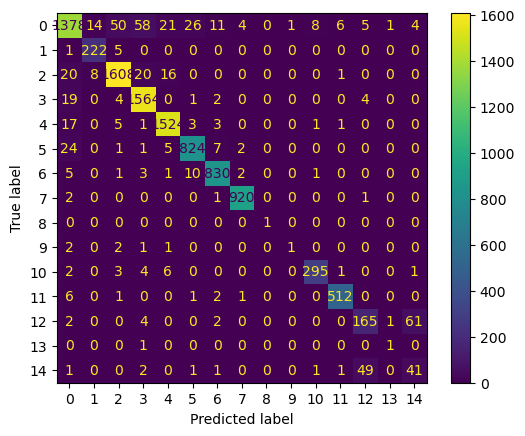

In [74]:
# Create the confusion matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)

# # Create a heatmap of the confusion matrix
# sns.heatmap(cm, annot=True, fmt='d', cmap='plasma')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix)

cm_display.plot()
plt.show()

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# calculating precision
precision = precision_score(y_test, y_pred, average='macro')  # or 'micro', 'weighted', None
print("Precision:", precision)

# calculating recall
recall = recall_score(y_test, y_pred, average='macro')  # or 'micro', 'weighted', None
print("Recall:", recall)

# calculating f1-score
f1 = f1_score(y_test, y_pred, average='macro')  # or 'micro', 'weighted', None
print("F1-score:", f1)

# calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Precision: 0.8212190401707417
Recall: 0.8310114931770688
F1-score: 0.8072716961140235
Accuracy: 0.9804878048780488


In [47]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a random forest classifier
rf = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Tuned Random Forest Accuracy:", accuracy)




Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.9823042731551963
Tuned Random Forest Accuracy: 0.981922525107604


In [48]:
y_pred_rf

array([2, 4, 4, ..., 0, 7, 3], dtype=int64)

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# calculating precision
precision = precision_score(y_test, y_pred_rf, average='macro')  # or 'micro', 'weighted', None
print("Precision:", precision)

# calculating recall
recall = recall_score(y_test, y_pred_rf, average='macro')  # or 'micro', 'weighted', None
print("Recall:", recall)

# calculating f1-score
f1 = f1_score(y_test, y_pred_rf, average='macro')  # or 'micro', 'weighted', None
print("F1-score:", f1)

# calculating accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Precision: 0.8216481025919594
Recall: 0.8265661912939203
F1-score: 0.8020334181081794
Accuracy: 0.981922525107604


C:\Users\pvste\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
#Importing decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred1=dt.predict(X_test)
from sklearn.metrics import accuracy_score
print("Decision tree's Accuracy:",accuracy_score(y_test,y_pred1))


Decision tree's Accuracy: 0.9766618842659015


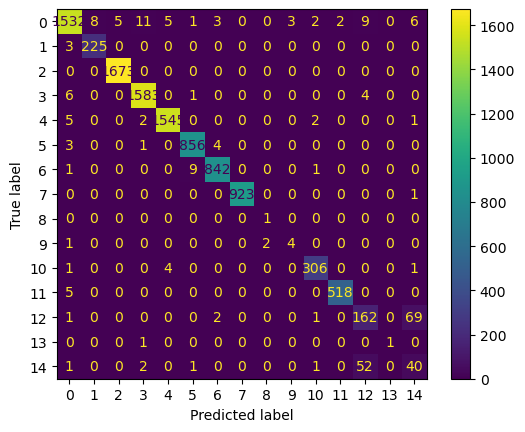

In [71]:
# Create the confusion matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred1)

# # Create a heatmap of the confusion matrix
# plt.figure(figsize=(12,10))
# sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix)

cm_display.plot()
plt.show()

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# calculating precision
precision = precision_score(y_test, y_pred1, average='macro')  # or 'micro', 'weighted', None
print("Precision:", precision)

# calculating recall
recall = recall_score(y_test, y_pred1, average='macro')  # or 'micro', 'weighted', None
print("Recall:", recall)

# calculating f1-score
f1 = f1_score(y_test, y_pred1, average='macro')  # or 'micro', 'weighted', None
print("F1-score:", f1)

# calculating accuracy
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)


Precision: 0.855716032838469
Recall: 0.8706658006828134
F1-score: 0.8462569244683411
Accuracy: 0.9766618842659015


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Score: 0.9784064883962877
Tuned Decision Tree Accuracy: 0.9782879005260641


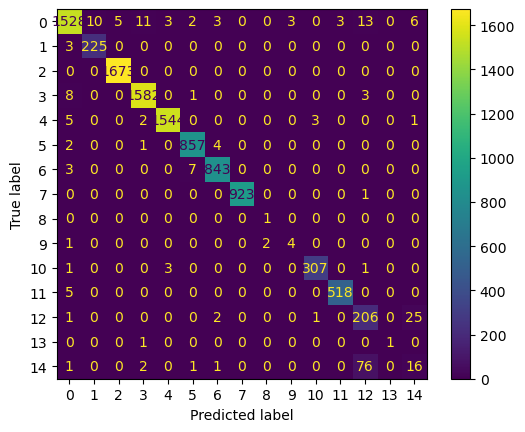

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1587
           1       0.96      0.99      0.97       228
           2       1.00      1.00      1.00      1673
           3       0.99      0.99      0.99      1594
           4       1.00      0.99      0.99      1555
           5       0.99      0.99      0.99       864
           6       0.99      0.99      0.99       853
           7       1.00      1.00      1.00       924
           8       0.33      1.00      0.50         1
           9       0.57      0.57      0.57         7
          10       0.99      0.98      0.99       312
          11       0.99      0.99      0.99       523
          12       0.69      0.88      0.77       235
          13       1.00      0.50      0.67         2
          14       0.33      0.16      0.22        97

    accuracy                           0.98     10455
   macro avg       0.85      0.87      0.84     10455
we

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best estimator to make predictions
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred_best)
print("Tuned Decision Tree Accuracy:", accuracy)
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_best)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix)

cm_display.plot()
plt.show()



# Optionally, print a full classification report
print("Classification Report:\n", classification_report(y_test, y_pred_best))


In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# calculating precision
precision = precision_score(y_test, y_pred_best, average='macro')  # or 'micro', 'weighted', None
print("Precision:", precision)

# calculating recall
recall = recall_score(y_test, y_pred_best, average='macro')  # or 'micro', 'weighted', None
print("Recall:", recall)

# calculating f1-score
f1 = f1_score(y_test, y_pred_best, average='macro')  # or 'micro', 'weighted', None
print("F1-score:", f1)

# calculating accuracy
accuracy = accuracy_score(y_test, y_pred_best)
print("Accuracy:", accuracy)

Precision: 0.8559225054824249
Recall: 0.8671419567157819
F1-score: 0.8415106184839406
Accuracy: 0.9790530846484935


In [55]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# check the accuracy
print(knn.score(X_test, y_test))
print("knn Accuracy:",accuracy_score(y_test,y_pred_knn))

0.9432807269249163
knn Accuracy: 0.9432807269249163


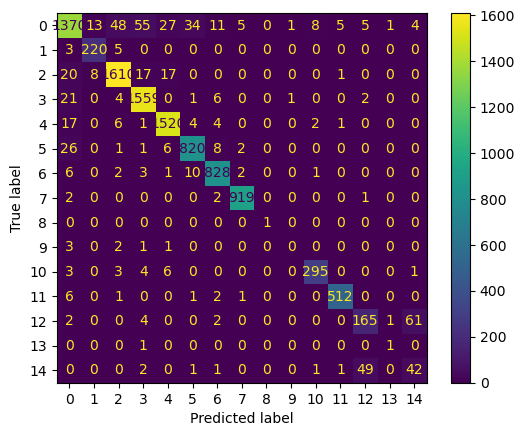

In [72]:
# Create the confusion matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred_knn)

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix)

cm_display.plot()
plt.show()

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# calculating precision
precision = precision_score(y_test, y_pred_knn, average='macro')  # or 'micro', 'weighted', None
print("Precision:", precision)

# calculating recall
recall = recall_score(y_test, y_pred_knn, average='macro')  # or 'micro', 'weighted', None
print("Recall:", recall)

# calculating f1-score
f1 = f1_score(y_test, y_pred_knn, average='macro')  # or 'micro', 'weighted', None
print("F1-score:", f1)

# calculating accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)


Precision: 0.8003737858377681
Recall: 0.8146670786411562
F1-score: 0.8061387734646178
Accuracy: 0.9432807269249163


In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 is for Manhattan distance, 2 is for Euclidean distance
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best estimator to make predictions
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Tuned KNN Accuracy:", accuracy)

# Create and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Optionally, print a full classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Best Score: 0.9457649533800273
Tuned KNN Accuracy: 0.9455762792922047
Confusion Matrix:
 [[1378   14   50   58   21   26   11    4    0    1    8    6    5    1
     4]
 [   1  222    5    0    0    0    0    0    0    0    0    0    0    0
     0]
 [  20    8 1608   20   16    0    0    0    0    0    0    1    0    0
     0]
 [  19    0    4 1564    0    1    2    0    0    0    0    0    4    0
     0]
 [  17    0    5    1 1524    3    3    0    0    0    1    1    0    0
     0]
 [  24    0    1    1    5  824    7    2    0    0    0    0    0    0
     0]
 [   5    0    1    3    1   10  830    2    0    0    1    0    0    0
     0]
 [   2    0    0    0    0    0    1  920    0    0    0    0    1    0
     0]
 [   0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0]
 [   2    0    2    1    1    0    0 

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# calculating precision
precision = precision_score(y_test, y_pred_knn, average='macro')  # or 'micro', 'weighted', None
print("Precision:", precision)

# calculating recall
recall = recall_score(y_test, y_pred_knn, average='macro')  # or 'micro', 'weighted', None
print("Recall:", recall)

# calculating f1-score
f1 = f1_score(y_test, y_pred_knn, average='macro')  # or 'micro', 'weighted', None
print("F1-score:", f1)

# calculating accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)


Precision: 0.8003737858377681
Recall: 0.8146670786411562
F1-score: 0.8061387734646178
Accuracy: 0.9432807269249163


In [60]:
import pandas as pd
!pip install tabulate

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Assuming y_test is your true labels and you have predictions for each model:
# y_pred_rf for Random Forest, y_pred_dt for Decision Tree, and y_pred_knn for KNN

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
precision_rf = precision_score(y_test, y_pred_rf, average='macro')

# Calculate metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_best)
f1_dt = f1_score(y_test, y_pred_best, average='macro')
recall_dt = recall_score(y_test, y_pred_best, average='macro')
precision_dt = precision_score(y_test, y_pred_best, average='macro')

# Calculate metrics for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
precision_knn = precision_score(y_test, y_pred_knn, average='macro')

# Create the DataFrame
data = {
    'Model': ['Random Forest', 'Decision Tree', 'KNN'],
    'Accuracy': [accuracy_rf, accuracy_dt, accuracy_knn],
    'F1 Score': [f1_rf, f1_dt, f1_knn],
    'Recall': [recall_rf, recall_dt, recall_knn],
    'Precision': [precision_rf, precision_dt, precision_knn]
}

model_evaluation_df = pd.DataFrame(data)



# Display the table with lines
print(model_evaluation_df.to_markdown(index=False))


| Model         |   Accuracy |   F1 Score |   Recall |   Precision |
|:--------------|-----------:|-----------:|---------:|------------:|
| Random Forest |   0.981923 |   0.802033 | 0.826566 |    0.821648 |
| Decision Tree |   0.979053 |   0.841511 | 0.867142 |    0.855923 |
| KNN           |   0.943281 |   0.806139 | 0.814667 |    0.800374 |


C:\Users\pvste\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
import joblib

joblib.dump(best_rf, 'model.pkl')


['model.pkl']